# Halo catalog

This notebook has plots of halo catalogs and how MORs look in them.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rc("text", usetex=True)
plt.rc("font", size=24, family='serif')

In [21]:
data = np.load("halo_catalog_z0_fox.npy")
inds = np.arange(len(data))
inds = np.random.choice(inds, 7000, replace=False)
d = data[inds]
print(data.shape, d.shape)

((831266, 6), (7000, 6))


In [22]:
M,R = d[:,-2:].T
Mmin = min(M)

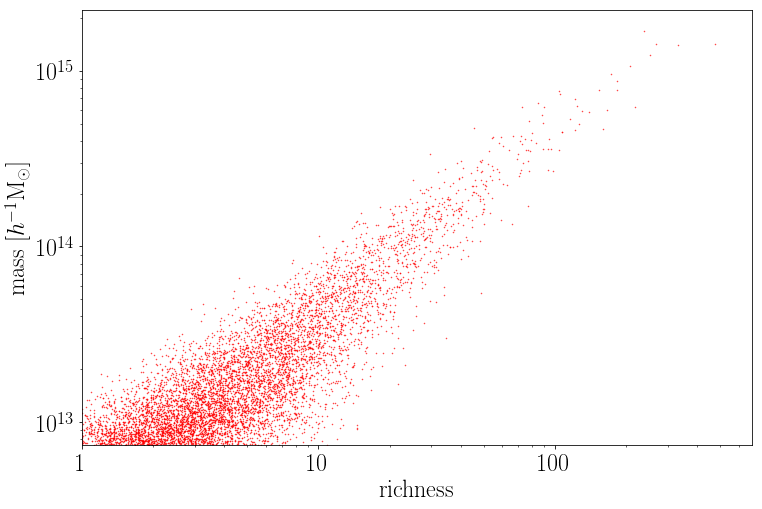

In [40]:
def make_MOR_scatter(ax, alpha=0.5):
    ax.scatter(R, M, c='r', alpha=alpha, marker='.', s=1)
    ax.loglog()
    ax.set_xlabel(r"richness")
    ax.set_ylabel(r"mass [$h^{-1}{\rm M}_\odot$]")
    ax.set_xticks([1,10,100])
    ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.set_xlim((1,ax.get_xlim()[1]))
    ax.set_ylim((Mmin, ax.get_ylim()[1]))
fig, ax = plt.subplots(1,1, figsize=(12,8))
make_MOR_scatter(ax, 0.8)
fig.savefig("/Users/tmcclintock/Desktop/figure1.png", dpi=300, bbox_inches='tight')

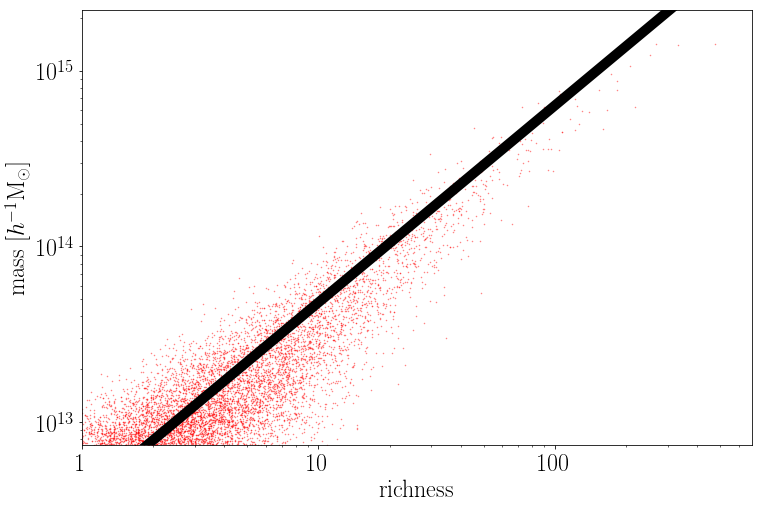

In [41]:
def MOR(lams):
    M0 = 2.35e14*0.7 #Msun/h
    F = 1.12
    return M0*(lams/30.)**F
fig, ax = plt.subplots(1,1, figsize=(12,8))
make_MOR_scatter(ax, 0.5)
lims = ax.get_xlim()
lams = np.linspace(lims[0],lims[1])
Ms = MOR(lams)
ax.plot(lams, Ms, c='k', linewidth=10)
fig.savefig("/Users/tmcclintock/Desktop/figure2.png", dpi=300, bbox_inches='tight')